## ML - Telemétricas

In [46]:
# import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

StatementMeta(, f3ed7ec6-1c6b-4ca1-839b-ce4f15f4158d, 48, Finished, Available, Finished)

# 0. Carregando os dados

In [54]:
df = spark.read.table("dt_sondas_clean_completa")
df.show(5)

StatementMeta(, f3ed7ec6-1c6b-4ca1-839b-ce4f15f4158d, 56, Finished, Available, Finished)

+-------------------+---------+-----------+-----+----+
|        sample_date| loc_name|  parameter|value|unit|
+-------------------+---------+-----------+-----+----+
|2024-02-01 21:00:00|AUT-MG050|Alimentação| 12.9|   V|
|2024-02-01 22:00:00|AUT-MG050|Alimentação| 12.9|   V|
|2024-02-01 23:00:00|AUT-MG050|Alimentação| 12.9|   V|
|2024-02-01 23:59:00|AUT-MG050|Alimentação| 12.9|   V|
|2024-02-02 01:00:00|AUT-MG050|Alimentação| 12.9|   V|
+-------------------+---------+-----------+-----+----+
only showing top 5 rows



# 1. Descrição dos dados

In [55]:
df = df.toPandas() ##Para conseguirmos escrever o código em Python

StatementMeta(, f3ed7ec6-1c6b-4ca1-839b-ce4f15f4158d, 57, Finished, Available, Finished)

## Lista de estações

In [56]:
# Quantidade de loc_name únicos
num_loc = df['loc_name'].nunique()
print(f"Quantidade de loc_name únicos: {num_loc}")

# Lista dos loc_name únicos
loc_names = df['loc_name'].unique()
print("Lista de loc_name:")
print(loc_names)


StatementMeta(, f3ed7ec6-1c6b-4ca1-839b-ce4f15f4158d, 58, Finished, Available, Finished)

Quantidade de loc_name únicos: 24
Lista de loc_name:
['AUT-MG050' 'AUT-JRB-01' 'AUT-JD' 'AUT-CP-PT49' 'AUT-MRB01-PT19' 'AUT-MD'
 'AUT-CB-PT02' 'AUT-MTI-PT14' 'AUT-BETIM' 'AUT-ETAF' 'AUT-CHICANE'
 'AUT-MPT-P7' 'AUT-CPM_Ativa' 'AUT_D2_JUS' 'AUT_D2_MON' 'AUT_TDM'
 'AUT-SUMP-01' 'AUT-SUMP-03' '' 'AUT-COM-PT43' 'UMF_TM-05' 'UMF_TM-02'
 'UMF_TM08-PT23' 'AUT-EP']


## Seleção das estações

In [57]:
# lista dos loc_name desejados
locs_desejados = ["AUT-MG050", "AUT-CPM_Ativa", "AUT-MPT-P7", "AUT-MRB01-PT19"]

# filtrando
df = df[df["loc_name"].isin(locs_desejados)]

print(df)

StatementMeta(, f3ed7ec6-1c6b-4ca1-839b-ce4f15f4158d, 59, Finished, Available, Finished)

                sample_date        loc_name    parameter  value unit
0       2024-02-01 21:00:00       AUT-MG050  Alimentação   12.9    V
1       2024-02-01 22:00:00       AUT-MG050  Alimentação   12.9    V
2       2024-02-01 23:00:00       AUT-MG050  Alimentação   12.9    V
3       2024-02-01 23:59:00       AUT-MG050  Alimentação   12.9    V
4       2024-02-02 01:00:00       AUT-MG050  Alimentação   12.9    V
...                     ...             ...          ...    ...  ...
5347777 2023-07-31 20:00:00  AUT-MRB01-PT19        Nível    0.0    m
5347778 2023-07-31 21:00:00  AUT-MRB01-PT19        Nível    0.0    m
5347779 2023-07-31 22:00:00  AUT-MRB01-PT19        Nível    0.0    m
5347780 2023-07-31 23:00:00  AUT-MRB01-PT19        Nível    0.0    m
5347781 2023-07-31 23:59:00  AUT-MRB01-PT19        Nível    0.0    m

[1611526 rows x 5 columns]


## Transposição de tabelas

In [60]:
# Pivotar no pandas
df = df.pivot_table(
    index=["sample_date", "loc_name"],  # colunas que viram índice
    columns="parameter",                # coluna que vira colunas
    values="value",                     # valores que preenchem
    aggfunc='first'                     # se houver duplicatas
).reset_index()

# Mostrar as primeiras 5 linhas
df.head(5)



StatementMeta(, f3ed7ec6-1c6b-4ca1-839b-ce4f15f4158d, 62, Finished, Available, Finished)

parameter,sample_date,loc_name,,Alimentação,Condutividade,Nível,ORP,Oxigênio dissolvido,Profundidade,Temperatura,Temperatura do Ar,Turbidez,Umidade do ar,pH
0,2019-06-11 09:00:00,AUT-MG050,NaN,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-06-11 09:15:00,AUT-MG050,NaN,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-06-11 09:30:00,AUT-MG050,NaN,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-06-11 09:45:00,AUT-MG050,NaN,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-06-11 10:00:00,AUT-MG050,NaN,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Contagem de NA

In [61]:
na_count = df.isna().sum()
print(na_count)

StatementMeta(, f3ed7ec6-1c6b-4ca1-839b-ce4f15f4158d, 63, Finished, Available, Finished)

parameter
sample_date                 0
loc_name                    0
                       143124
Alimentação                81
Condutividade            3335
Nível                   46754
ORP                      2642
Oxigênio dissolvido      2372
Profundidade             2918
Temperatura              2322
Temperatura do Ar      114657
Turbidez                 2246
Umidade do ar          114559
pH                       2321
dtype: int64


In [62]:
# Resumo de NA por coluna em tabela
na_summary = pd.DataFrame({
    "na_count": df.isna().sum(),
    "na_percent": df.isna().mean() * 100
}).sort_values(by="na_count", ascending=False)

na_summary


StatementMeta(, f3ed7ec6-1c6b-4ca1-839b-ce4f15f4158d, 64, Finished, Available, Finished)

,na_count,na_percent
parameter,,
,143124,85.826337
Temperatura do Ar,114657,68.755697
Umidade do ar,114559,68.696930
Nível,46754,28.036699
Condutividade,3335,1.999880
Profundidade,2918,1.749820
ORP,2642,1.584313
Oxigênio dissolvido,2372,1.422403
Temperatura,2322,1.392420


## Remoção de parâmetros com mais de 15% de NAs e (nível e " ")

In [63]:
# 1️⃣ Calcular percentual de NA por coluna
na_percent = df.isna().mean() * 100

# 2️⃣ Selecionar colunas com até 15% de NA
cols_to_keep = na_percent[na_percent <= 15].index.tolist()

# 3️⃣ Remover também 'Nível' e coluna vazia ''
cols_to_remove = ['Nível', '']
cols_to_keep = [c for c in cols_to_keep if c not in cols_to_remove]

# 4️⃣ Criar novo DataFrame filtrado
df = df[cols_to_keep]

# 5️⃣ Verificar resultado
print(f"Colunas restantes ({len(df.columns)}): {df.columns.tolist()}")
df.head()


StatementMeta(, f3ed7ec6-1c6b-4ca1-839b-ce4f15f4158d, 65, Finished, Available, Finished)

Colunas restantes (10): ['sample_date', 'loc_name', 'Alimentação', 'Condutividade', 'ORP', 'Oxigênio dissolvido', 'Profundidade', 'Temperatura', 'Turbidez', 'pH']


parameter,sample_date,loc_name,Alimentação,Condutividade,ORP,Oxigênio dissolvido,Profundidade,Temperatura,Turbidez,pH
0,2019-06-11 09:00:00,AUT-MG050,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-06-11 09:15:00,AUT-MG050,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-06-11 09:30:00,AUT-MG050,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-06-11 09:45:00,AUT-MG050,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-06-11 10:00:00,AUT-MG050,11.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Tipo de dados

In [64]:
df['sample_date'] = pd.to_datetime(df['sample_date'])
df.dtypes

StatementMeta(, f3ed7ec6-1c6b-4ca1-839b-ce4f15f4158d, 66, Finished, Available, Finished)

parameter
sample_date            datetime64[ns]
loc_name                       object
Alimentação                   float64
Condutividade                 float64
ORP                           float64
Oxigênio dissolvido           float64
Profundidade                  float64
Temperatura                   float64
Turbidez                      float64
pH                            float64
dtype: object

## Detecção de outlier

In [65]:
# Separando colunas numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Separando colunas não numéricas
cat_cols = df.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]']).columns


StatementMeta(, f3ed7ec6-1c6b-4ca1-839b-ce4f15f4158d, 67, Finished, Available, Finished)

In [66]:
outlier_dict = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_dict[col] = outliers.shape[0]  # número de outliers por coluna

print("Número de outliers por coluna:")
print(outlier_dict)


StatementMeta(, f3ed7ec6-1c6b-4ca1-839b-ce4f15f4158d, 68, Finished, Available, Finished)

Número de outliers por coluna:
{'Alimentação': 786, 'Condutividade': 4581, 'ORP': 5989, 'Oxigênio dissolvido': 6307, 'Profundidade': 7342, 'Temperatura': 285, 'Turbidez': 19087, 'pH': 8491}


StatementMeta(, f3ed7ec6-1c6b-4ca1-839b-ce4f15f4158d, 69, Finished, Available, Finished)

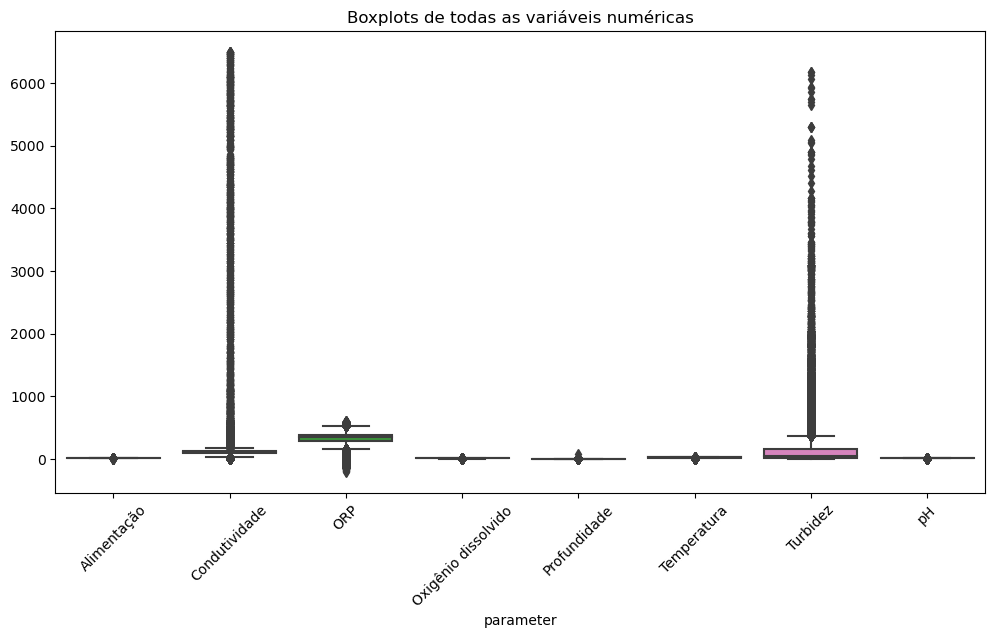

In [67]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplots de todas as variáveis numéricas")
plt.xticks(rotation=45)
plt.show()